# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

Istogramma delle frequenze di campionamento

Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Decoding failed. ffmpeg returned error code: 3199971767

Output from ffmpeg/avlib:

ffmpeg version 7.0-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve --enable-libxvid --enable-li

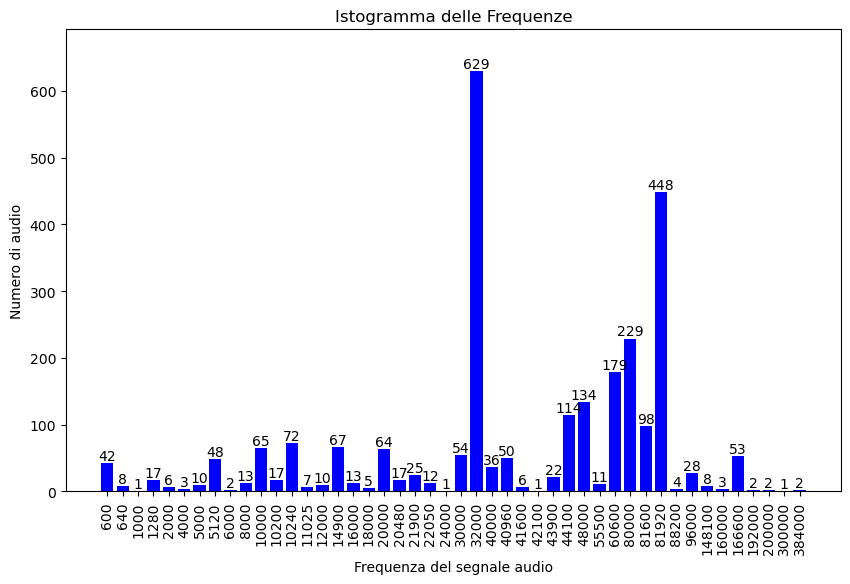

In [1]:
from Set_Data.Lettura_Freq import conteggio_frequenze_campionamento
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies = conteggio_frequenze_campionamento()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies.keys())
audio_numbers = list(frequencies.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 6))  # Imposta larghezza a 10 pollici e altezza a 6 pollici

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre e ruotale di 90 gradi
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation=90)

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black')

plt.show()  # Mostra il grafico

Istogramma delle durate dei file audio

Progresso: 100.00%
Informazioni audio lette con successo.
Totale file audio: 1950


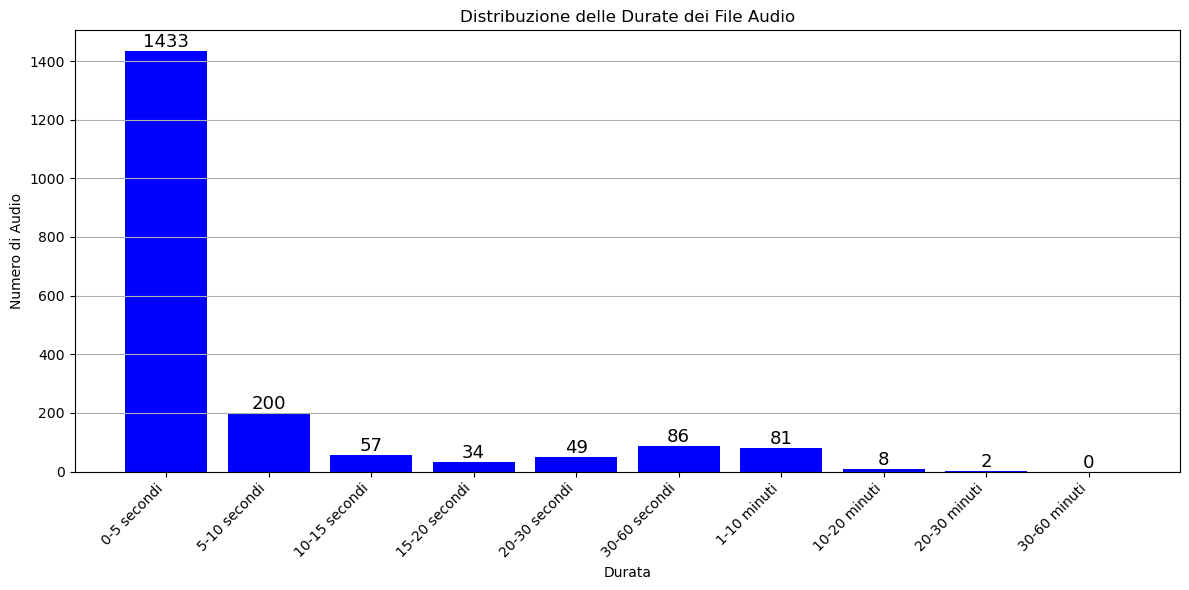

In [3]:
from Set_Data.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

def get_interval(minutes, seconds):
    if minutes == 0:
        if seconds < 5:
            return "0-5 secondi"
        elif seconds < 10:
            return "5-10 secondi"
        elif seconds < 15:
            return "10-15 secondi"
        elif seconds < 20:
            return "15-20 secondi"
        elif seconds < 30:
            return "20-30 secondi"
        else:
            return "30-60 secondi"
    elif minutes < 10:
        return "1-10 minuti"
    elif minutes < 20:
        return "10-20 minuti"
    elif minutes < 30:
        return "20-30 minuti"
    else:
        return "30-60 minuti"

audio_info_dict = audio_info()

intervals = {
    "0-5 secondi": 0,
    "5-10 secondi": 0,
    "10-15 secondi": 0,
    "15-20 secondi": 0,
    "20-30 secondi": 0,
    "30-60 secondi": 0,
    "1-10 minuti": 0,
    "10-20 minuti": 0,
    "20-30 minuti": 0,
    "30-60 minuti": 0,
}

for minutes, seconds in audio_info_dict.values():
    interval = get_interval(minutes, seconds)
    intervals[interval] += 1

labels, counts = zip(*intervals.items())

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color='blue')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=13, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title('Distribuzione delle Durate dei File Audio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Istogramma delle durate dei file audio (intervallo 0-15 secondi)

Progresso: 100.00%
Informazioni audio lette con successo.
Totale file audio: 1950


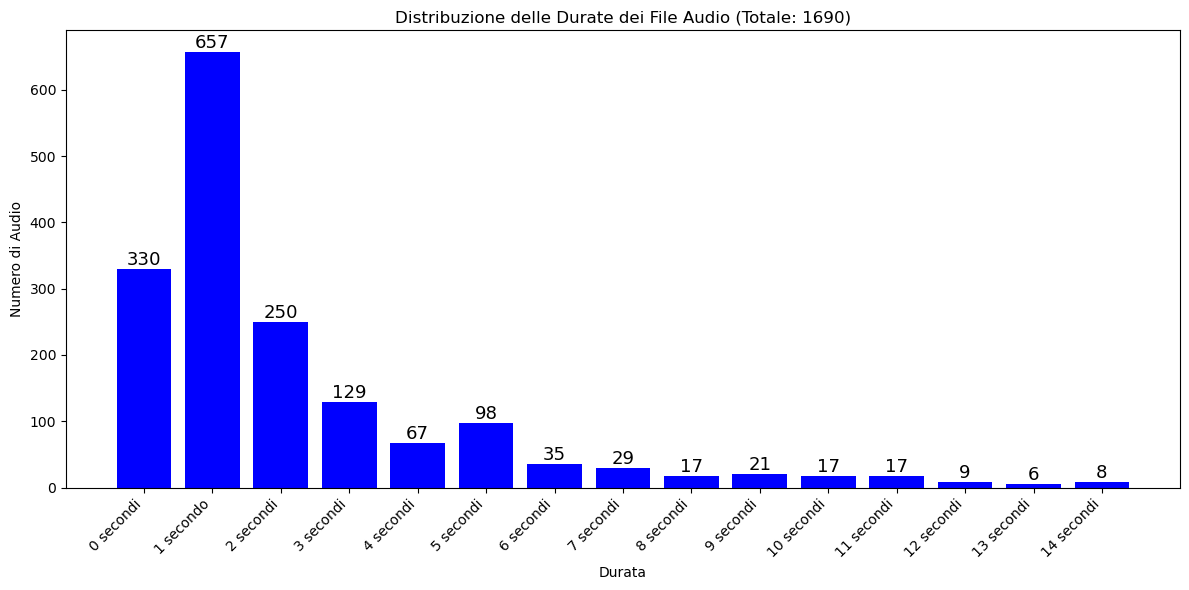

In [7]:
from Set_Data.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

# Leggiamo i file audio
audio_info_dict = audio_info()

# Definiamo gli intervalli per il conteggio
intervals = {f"{i} secondi" if i != 1 else "1 secondo": 0 for i in range(15)}

# Contatore per il numero totale di file audio
total_files = 0

# Conteggio dei valori per intervallo
for minutes, seconds in audio_info_dict.values():
    if minutes == 0 and seconds < 15:
        interval_label = f"{seconds} secondi" if seconds != 1 else "1 secondo"
        intervals[interval_label] += 1
        total_files += 1

# Estraiamo i dati per il grafico
labels, counts = zip(*intervals.items())

# Creiamo il grafico a barre
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color='blue')

# Aggiungiamo l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=13, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title(f'Distribuzione delle Durate dei File Audio (Totale: {total_files})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

DA FARE - Frequenze massime

File: AHD_Airmar.wav, Posizione: Target, Frequenza di campionamento: 44100, Massima frequenza di riproduzione: 19261
Progresso: 0.04%File: SanctSound_CI04_04_acousticrelease_20200202T071340Z.wav, Posizione: Target, Frequenza di campionamento: 48000, Massima frequenza di riproduzione: 24000
Progresso: 0.08%File: 20171104-1_1.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 10812
Progresso: 0.11%File: 20171104a-2_2.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 2766
Progresso: 0.15%File: 20171105a-3_3.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1758
Progresso: 0.19%File: 20171106-4_4.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1297
Progresso: 0.23%File: 20171107-5_5.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 12453
Progresso: 0.27%File: 20171107b-6_6

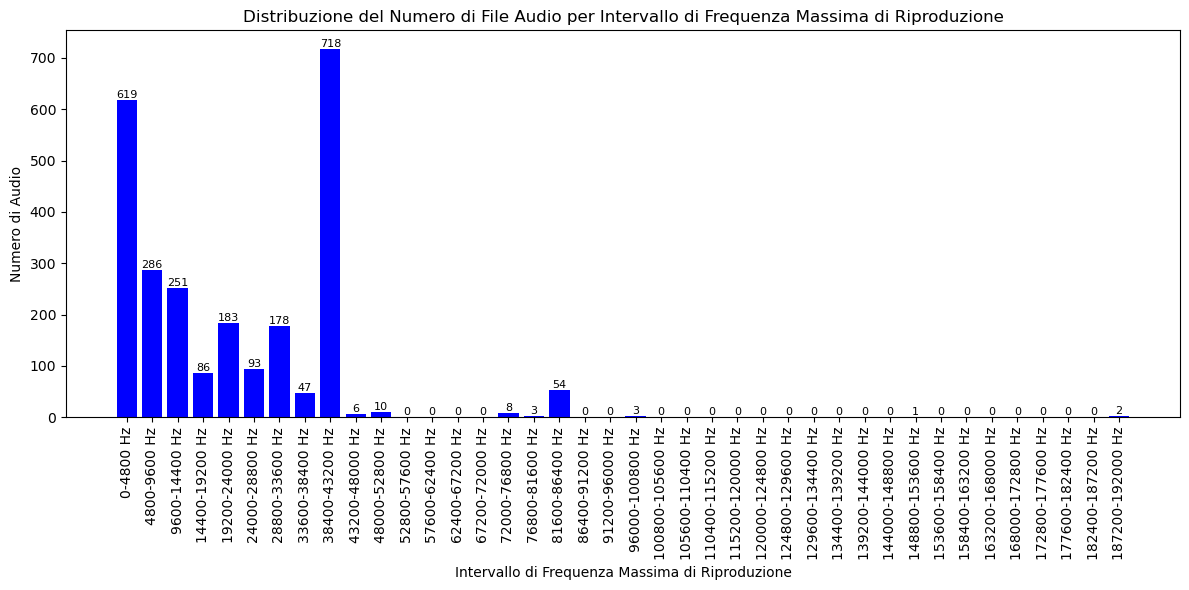

In [4]:
import matplotlib.pyplot as plt
from Set_Data.Lettura_Freq import conteggio_massime_frequenze_riproduzione

# Ottieni il dizionario con il conteggio delle frequenze massime di riproduzione
max_frequency_counter = conteggio_massime_frequenze_riproduzione()

# Trova la massima frequenza massima di riproduzione tra tutti i file audio
max_playback_frequency = max(max_frequency_counter.keys())

# Definisci il numero di intervalli di frequenza desiderati
num_intervals = 40

# Calcola l'ampiezza di ciascun intervallo di frequenza
frequency_step = max_playback_frequency / num_intervals

# Inizializza il dizionario per contare il numero di file audio per ciascun intervallo di frequenza
frequency_counts = {f'{i * frequency_step:.0f}-{(i + 1) * frequency_step:.0f} Hz': 0 for i in range(num_intervals)}

# Aggiorna il conteggio dei file audio per ciascun intervallo di frequenza
for frequency, count in max_frequency_counter.items():
    interval = min(int(frequency / frequency_step), num_intervals - 1)  # Assicura che non superi il numero massimo di intervalli
    interval_key = f'{interval * frequency_step:.0f}-{(interval + 1) * frequency_step:.0f} Hz'
    frequency_counts[interval_key] += count

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
bars = plt.bar(frequency_counts.keys(), frequency_counts.values(), color='blue')

# Aggiungi l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, frequency_counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8, color='black')

# Personalizza l'aspetto del grafico
plt.xlabel('Intervallo di Frequenza Massima di Riproduzione')
plt.ylabel('Numero di Audio')
plt.title(f'Distribuzione del Numero di File Audio per Intervallo di Frequenza Massima di Riproduzione')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1]:
from Set_Data.Bit_Depth import audio_info

bit_depth_count = audio_info()

print("\nContatore per ogni Bit Depth differente:")
for bit_depth, count in bit_depth_count.items():
    print(f"Bit Depth {bit_depth} bit: {count} file")

Progresso: 100.00%
Totale file audio (.wav): 1894

Contatore per ogni Bit Depth differente:
Bit Depth 16 bit: 1854 file
Bit Depth 8 bit: 17 file
Bit Depth 24 bit: 19 file
Bit Depth 32 bit: 4 file


In [2]:
from Set_Data.Audio_Analysis import analyze_audio_files
audio_file_info = analyze_audio_files()


Progresso: 0.08%

KeyboardInterrupt: 